In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
#read the csv file
df = pd.read_csv('BikeDataCleaned.csv')

# Quick look at the data
df.head()

,HomeOwnerFlag,YearlyIncome,AveMonthSpend,BikeBuyer,CountryRegionName_In_Europe,Education_Below_Bachelors,Occupation_Clerical_Manual,Occupation_Management_Professional,Gender_M,MaritalStatus_S,NumberCarsOwned_3_Or_More,NumberChildrenAtHome_2_Or_More
0,0,239.033470,4.406719,1,1,0,1,0,1,1,0,0
1,0,155.132202,3.610918,0,1,0,1,0,0,1,0,0
2,1,352.900836,4.787492,1,0,0,1,0,1,1,0,1
3,0,295.514805,3.761200,0,0,0,0,1,0,1,0,0
4,0,166.198676,4.276666,1,1,1,1,0,1,1,0,0


The above dataset has been cleaned, all that remains is scaling

In [4]:
# Isolate the target variable
y = df.BikeBuyer  

# Isolate the feature variables
X = df.drop('BikeBuyer', axis=1)

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 12)

# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/zum/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [5]:
# Define the function that will display every confusion matrix

def plot_confusion_matrix(models):
    for m in models:
        model = m['model']
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_accuracy = accuracy_score(y_pred, y_test)
        print('{} accuracy is {}'.format(m['label'], model_accuracy))
        cm = confusion_matrix(y_test,y_pred)
        print(cm)
        print(classification_report(y_test,y_pred))
        sns.heatmap(cm, annot = True, fmt = "d") 
        plt.show()

It's advised to apply a gridsearch to your models, so one can pinpoint the exact parameters that are best.

For the sake of simplicity, we'll just use the default model parameters.

KNN accuracy is 0.761278538813
[[1953  780]
 [ 527 2215]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2733
           1       0.74      0.81      0.77      2742

   micro avg       0.76      0.76      0.76      5475
   macro avg       0.76      0.76      0.76      5475
weighted avg       0.76      0.76      0.76      5475



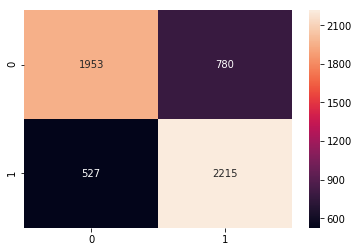

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest accuracy is 0.847123287671
[[2198  535]
 [ 302 2440]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2733
           1       0.82      0.89      0.85      2742

   micro avg       0.85      0.85      0.85      5475
   macro avg       0.85      0.85      0.85      5475
weighted avg       0.85      0.85      0.85      5475



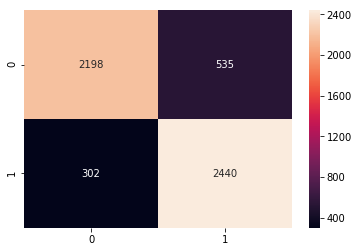

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy is 0.749406392694
[[2123  610]
 [ 762 1980]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2733
           1       0.76      0.72      0.74      2742

   micro avg       0.75      0.75      0.75      5475
   macro avg       0.75      0.75      0.75      5475
weighted avg       0.75      0.75      0.75      5475



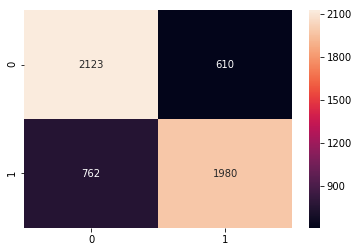

Gradient Boosting Classifier accuracy is 0.753059360731
[[2157  576]
 [ 776 1966]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      2733
           1       0.77      0.72      0.74      2742

   micro avg       0.75      0.75      0.75      5475
   macro avg       0.75      0.75      0.75      5475
weighted avg       0.75      0.75      0.75      5475



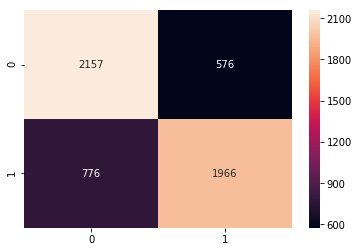

Extra Trees Classifier accuracy is 0.857716894977
[[2223  510]
 [ 269 2473]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2733
           1       0.83      0.90      0.86      2742

   micro avg       0.86      0.86      0.86      5475
   macro avg       0.86      0.86      0.86      5475
weighted avg       0.86      0.86      0.86      5475



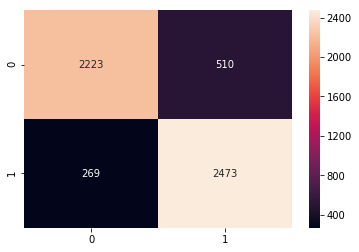

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDC Classifier accuracy is 0.681461187215
[[1857  876]
 [ 868 1874]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2733
           1       0.68      0.68      0.68      2742

   micro avg       0.68      0.68      0.68      5475
   macro avg       0.68      0.68      0.68      5475
weighted avg       0.68      0.68      0.68      5475



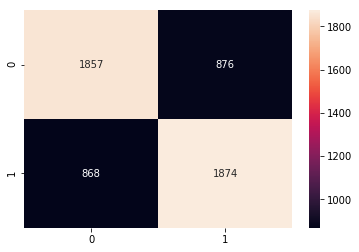

In [6]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Define the models you want to use
models = [
 {'label': 'KNN', 'model': KNeighborsClassifier()},
 {'label': 'Random Forest', 'model': RandomForestClassifier()},
 {'label': 'Logistic Regression', 'model': LogisticRegression()},
 {'label': 'Gradient Boosting Classifier', 'model': GradientBoostingClassifier()},
 {'label': 'Extra Trees Classifier', 'model': ExtraTreesClassifier()},
 {'label': 'SGDC Classifier', 'model' : SGDClassifier()}
  ]

plot_confusion_matrix(models)